<a href="https://colab.research.google.com/github/bgoldfe2/JAIC-Create-AI/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


In [13]:
train_data = pd.read_csv('data_ex3.csv')
train_data.describe()

,Var_X,Var_Y
count,20.000000,20.000000
mean,0.562083,-0.215209
std,1.608587,6.278468
min,-2.791400,-11.132700
25%,-0.414105,-5.450578
50%,0.462765,2.196495
75%,1.562530,5.199015
max,3.328530,8.438230


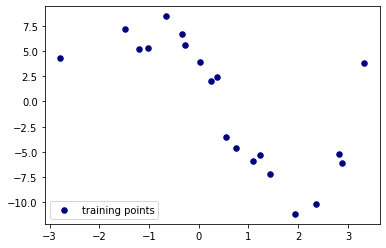

In [39]:
x = train_data['Var_X']

y = train_data['Var_Y']

plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

plt.legend(loc='lower left')

plt.show()

In [14]:
# Visual inspection implies that this is a higher than degree 2
# features, a selection of models with degree 3,4,5 would
# be useful to see how well these map to the points
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py


X = train_data.loc[:,'Var_X'].to_numpy().reshape(20,1)
print(X.shape)
Y = train_data.loc[:,'Var_Y'].to_numpy().reshape(20,1)
print(Y.shape)


(20, 1)
(20, 1)


[  4.75931376   3.0657425    6.3915357    5.75014311   4.53610416
  -9.96380899  -5.72836837  -1.93085348   4.27382656  -5.8454944
   6.26560438   0.83616861  -7.30153999   1.73877929   4.35662139
  -4.59581099  -6.67273417  -0.4113099  -10.14988888   6.3217897 ]


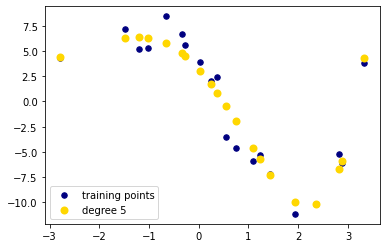

In [58]:

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
#plt.plot(x, y, color='cornflowerblue', linewidth=lw,\
#      label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

# change degree to see how the fit changes
degree = 5
color_count = degree - 3

poly_feat = PolynomialFeatures(degree)
X_poly = poly_feat.fit_transform(X)
poly_model = Ridge().fit(X_poly,y)
y_plot = poly_model.predict(X_poly)
print(y_plot)
plt.scatter(x, y_plot, color=colors[color_count], linewidth=lw,\
          label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

[ 3.97224712  1.61545353  8.14593359  5.82904927  3.6204003  -7.8370022
 -5.88466915 -3.2471687   0.34253069 -4.55958518  8.73161427 -0.8142407
 -6.76686539  0.10528155  2.63643754 -5.17257758 -5.01965951 -1.97476513
 -7.34234149  7.55326396]
[ 4.58563202  2.82380761  6.17478371  5.60307063  4.35377758 -9.9126589
 -6.02428619 -2.28703773  3.84238623 -5.55268913  5.95817473  0.52062915
 -7.52112871  1.44929791  4.47130173 -4.92590589 -6.34806282 -0.75292867
 -9.85393347  6.1439813 ]
[  4.36380484   2.66694092   6.35367703   5.43009985   4.13458084
  -9.88702099  -5.77931282  -2.14459688   4.27643955  -5.86891035
   6.42763411   0.50512833  -7.29392472   1.37525406   4.34719929
  -4.69313335  -6.68888622  -0.69145762 -10.09713154   6.1754528 ]


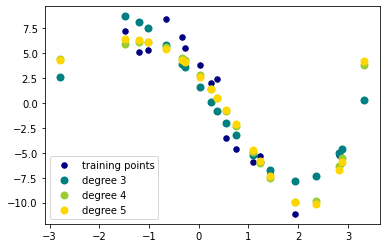

In [47]:
do_poly()

In [31]:
y_plot = LinearRegression(fit_intercept = False).fit(X_poly,y)

In [ ]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()